In [0]:
import tweepy

import pandas as pd

In [0]:
from bs4 import BeautifulSoup
news = "https://timesofindia.indiatimes.com/business/india-business/trade-unions-nationwide-strike-on-january-8-things-to-know/articleshow/73132594.cms"
import urllib.request
request = urllib.request.Request(news)
response = urllib.request.urlopen(request)
content = response.read()
soup = BeautifulSoup(content,'lxml')
data = soup.find_all("p")
for i in data:
  print(i.text)
text = data[5:-1]
text = [text[i].text for i in range(len(text))]
finalnews = " ".join(text)
finalnews


C2 Education
KETTO
m1 Homes
Yoganol
Milaap
ZEEAYURVEDA
The Times Of India
The Times Of India
The Times Of India
ZEEAYURVEDA
KETTO
Milaap
Yoganol
ZEEAYURVEDA
Yoganol
The Times Of India
The Times Of India
The Times Of India
Refrain from posting comments that are obscene, defamatory or inflammatory, and do not indulge in personal attacks, name calling or inciting hatred against any community. Help us delete comments that do not follow these guidelines by marking them offensive. Let's work together to keep the conversation civil.

ZEEAYURVEDA
KETTO
Yoganol
Milaap
Copyright © 2020 Bennett, Coleman & Co. Ltd. All rights reserved. For reprint rights: Times Syndication Service


"ZEEAYURVEDA The Times Of India The Times Of India The Times Of India ZEEAYURVEDA KETTO Milaap Yoganol ZEEAYURVEDA Yoganol The Times Of India The Times Of India The Times Of India Refrain from posting comments that are obscene, defamatory or inflammatory, and do not indulge in personal attacks, name calling or inciting hatred against any community. Help us delete comments that do not follow these guidelines by marking them offensive. Let's work together to keep the conversation civil.  ZEEAYURVEDA KETTO Yoganol Milaap"

In [0]:
len(finalnews)

522

TWITTER API KEYS

In [0]:
import tweepy
import pandas as pd 

consumer_key = 'G2pTcWVrwOEocFFP945CwTSu1'
consumer_key_secret = '1UCE0J3ZWKqVh0T7qKrc56HvZZ0JkkZSgdtVFpQtFrMCqq7rlO'
access_token = '1039066641995366401-nedSf8MHVwPHC1HjYP6vVJGbTBE6HU'
access_token_secret = 'wYYnYWgLD5kAdR9HlCMojINgBP6gez5Ln2k7Dslewme5G'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

SEARCH QUERY AND COUNT=2200




In [0]:
query = 'ai'
max_tweets = 2200
searched_tweets = [status for status in tweepy.Cursor(api.search, q=query, lang='en').items(max_tweets)]

In [0]:
len(searched_tweets)

2200

In [0]:
# type(searched_tweets[1])


In [0]:
#searched_tweets[4]

In [0]:
# import json 
# status = searched_tweets[4]
# json_str = json.dumps(status._json)

In [0]:
import json 
public_tweets = []
for i in range(len(searched_tweets)):
  status = searched_tweets[i]
  if status.lang == 'en':
    json_str = json.dumps(status._json)
    public_tweets.append(status.text)

In [0]:
pd.DataFrame(public_tweets)

,0
0,RT @koshyaby27: The Pitfalls of Linear Regress...
1,RT @happeehour: Happy Birthday to BLACKPINK's ...
2,@MuhammarM @thisisadedotun @faatihu1 You’re re...
3,RT @Julez_Norton: This drone delivers books to...
4,RT @ZingHR: Well Done #India \n\n50 countries ...
...,...
2195,From Hype to Reality Are We on the Cusp of a #...
2196,RT @shataaah: y’all... i just hit a new low. i...
2197,"RT @oppomobileindia: Freedom, fun or flair, #F..."
2198,RT @PATHHealthAI: Researchers awarded $1.2M to...


In [0]:
# public_tweets = []
# for tweet in api.search(q='modi -filter:retweets', count = 100, lang = 'en',):
#     (public_tweets.append(tweet.text))
#     print(tweet.text)

In [0]:
pd.options.display.max_colwidth = 1000
pd.set_option("display.max_column", None)
public_tweets = pd.DataFrame(public_tweets)
public_tweets.columns = ["tweets"] 

LIBRARIES FOR SENTIMANT ANALYSIS

In [0]:
import nltk
nltk.download('punkt')
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

from string import punctuation
custom = stop_words+list(punctuation)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
    return tokens

In [0]:
text = public_tweets["tweets"].tolist()

In [0]:
public_tweets["tweets"]

0         RT @koshyaby27: The Pitfalls of Linear Regression and How to Avoid Them \nby @ghayes_datasci \n\n#datascience #machinelearning #ai #bigdata #a…
1                                        RT @happeehour: Happy Birthday to BLACKPINK's lovely angel, Jennie! 👼\n\n#HappyJennieDay https://t.co/1FgpRZba4K
2                                                      @MuhammarM @thisisadedotun @faatihu1 You’re replying to someone that is braindead. Laifin ka ne ai
3            RT @Julez_Norton: This drone delivers books to Indonesian children #Drones #Robotics #technology #ArtificialIntelligence #AI @ShiCooks @Nev…
4       RT @ZingHR: Well Done #India \n\n50 countries with the largest proportion of female #softwaredevelopers \n#Infographic\n\nv @ravikikan @hackerra…
                                                                              ...                                                                        
2195                           From Hype to Reality Are We on the Cusp of a 

In [0]:
tags = ["NN", "VB"]
tweet_corpus = []
def tweet_filter(tweets):
  for i in tweets:
    a = re.sub("(http|https)://[.a-z/0-9/A-Z]*","",i)  # removing url links
    a = re.sub("(RT|@|#)[a-z/A-Z/0-9]*","",a) # removing usernames
    # tweet_corpus.append(a)
    words = [word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(a)) if pos in tags]
    tweet_corpus.append(" ".join(words))

In [0]:
tweet_filter(public_tweets["tweets"])
tweet_corpus

['Avoid',
 'angel 👼',
 'replying someone ai',
 '_Norton drone',
 'proportion v …',
 'everyone be data person …',
 'article use library i verizon',
 'netflix ter nos',
 'algorithm brain learn “ pe…',
 'follow record sky controller 🎮 …',
 '…',
 'ai',
 '_Corry job be anything do environment Most…',
 'robot work art …',
 "deaf p'ment cmpny college amp hi…",
 'software identify',
 'Freedom fun flair watch turn …',
 'Getting …',
 'surplus i consider subset relative',
 'Junmyeon s insta story everything ❤️ …',
 '',
 'team chance % chance % team chance % chance %',
 'team chance % chance % team chance % chance % chan…',
 'team chance % chance % team chance % chance % chance …',
 'Global',
 'team chance % chance % team chance % chance % chance',
 'team chance % chance % team chance % chance % chance …',
 '_ anybody universe deserve love affection Ps jadi klo ga pernah bkin isd…',
 'team chance % chance % team chance % chance % …',
 'Year Year …',
 'team chance % chance % team chance % chance % 

## *CLEANING TEXT LIKE LINKS USING REGEX*

In [0]:
tweet_corpus = []
for i in public_tweets['tweets']:
  # removing url links
  a = re.sub("(http|https)://[.a-z/0-9/A-Z]*","",i)
  a = re.sub("(RT|@|#)[a-z/A-Z/0-9]*","",a)
  # removing usernames
  tweet_corpus.append(a)

RT @koshyaby27: The Pitfalls of Linear Regression and How to Avoid Them 
by @ghayes_datasci 

#datascience #machinelearning #ai #bigdata #a…
RT @happeehour: Happy Birthday to BLACKPINK's lovely angel, Jennie! 👼

#HappyJennieDay https://t.co/1FgpRZba4K
@MuhammarM @thisisadedotun @faatihu1 You’re replying to someone that is braindead. Laifin ka ne ai
RT @Julez_Norton: This drone delivers books to Indonesian children #Drones #Robotics #technology #ArtificialIntelligence #AI @ShiCooks @Nev…
RT @ZingHR: Well Done #India 

50 countries with the largest proportion of female #softwaredevelopers 
#Infographic

v @ravikikan @hackerra…
RT @Techhelplistcom: Can everyone be a data person?

#MachineLearning  #cybersecurity #ransomware #hacking #cybersec #strategy #leadership…
great article on how to use the Typekit's new Dynamic Subsetting in any library i go att or verizon
@Stylerinolol netflix, mas deve ter nos sites ai
DeepMind’s new algorithm has uncovered new details about how dopamine helps th

In [0]:
#public_tweets["tweets"][1]

In [0]:
#re.sub("(RT|@|#)[a-z/A-Z/0-9]*","", public_tweets["tweets"][1])

In [0]:
tweet_corpus

[' : The Pitfalls of Linear Regression and How to Avoid Them \nby _datasci \n\n    …',
 " : Happy Birthday to BLACKPINK's lovely angel, Jennie! 👼\n\n ",
 '   You’re replying to someone that is braindead. Laifin ka ne ai',
 ' _Norton: This drone delivers books to Indonesian children       …',
 ' : Well Done  \n\n50 countries with the largest proportion of female  \n\n\nv  …',
 ' : Can everyone be a data person?\n\n       …',
 "great article on how to use the Typekit's new Dynamic Subsetting in any library i go att or verizon",
 ' netflix, mas deve ter nos sites ai',
 'DeepMind’s new algorithm has uncovered new details about how dopamine helps the brain learn.\n\n“It gives us a new pe… ',
 ' _h_sheth: This  can follow and record you from the sky.\n no controller required. 🎮\n\n    …',
 ' : The Ultimate Data Science Prerequisite Learning List\n \n\n    …',
 'Northern Nigeria are simultaneously visiting very similar horrors on Bah’ai, Shia Muslims, Christians, Budhists and… ',
 '_Corry Tho

In [0]:
text = [my_tokenizer(s) for s in tweet_corpus]

In [0]:
text

[['pitfall', 'linear', 'regression', 'avoid', '_datasci'],
 ['happy', 'birthday', 'blackpink', 'lovely', 'angel', 'jennie'],
 ['replying', 'someone', 'braindead', 'laifin'],
 ['_norton', 'drone', 'delivers', 'book', 'indonesian', 'child'],
 ['well', 'done', 'country', 'largest', 'proportion', 'female'],
 ['everyone', 'data', 'person'],
 ['great',
  'article',
  'use',
  'typekit',
  'new',
  'dynamic',
  'subsetting',
  'library',
  'att',
  'verizon'],
 ['netflix', 'deve', 'ter', 'site'],
 ['deepmind',
  'new',
  'algorithm',
  'ha',
  'uncovered',
  'new',
  'detail',
  'dopamine',
  'help',
  'brain',
  'learn',
  'give',
  'new',
  'pe…'],
 ['_h_sheth', 'follow', 'record', 'sky', 'controller', 'required'],
 ['ultimate', 'data', 'science', 'prerequisite', 'learning', 'list'],
 ['northern',
  'nigeria',
  'simultaneously',
  'visiting',
  'similar',
  'horror',
  'bah',
  'shia',
  'muslim',
  'christian',
  'budhists',
  'and…'],
 ['_corry',
  'job',
  'loss',
  'likely',
  'anythin

In [0]:
corpus = []
for i in text:
  corpus.append(" ".join(i))


In [0]:
corpus[0]

'pitfall linear regression avoid _datasci'

SELECTING NOUNS FROM CORPUS

Using TextBlob

In [0]:
import nltk
nltk.download('brown')
from textblob import TextBlob
blob = TextBlob(corpus[0])
blob.noun_phrases

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


WordList(['pitfall linear regression'])

Using NLTK

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
print([word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(corpus[0])) if pos[0] == 'N'])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
['pitfall', 'regression', 'avoid', '_datasci']


In [0]:

sent = []
tags = ["NN", "VB", "VBP"]
for i in corpus:
  words = [word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(corpus[9])) if pos in tags]
  sent.append(" ".join(words))


In [0]:
sent

['pitfall regression avoid _datasci',
 'birthday jennie',
 'someone braindead laifin',
 '_norton drone delivers book child',
 'country proportion female',
 'everyone data person',
 'article use att verizon',
 'ter site',
 'algorithm ha detail dopamine help brain pe…',
 '_h_sheth record sky controller',
 'data science prerequisite list',
 'nigeria horror bah shia muslim budhists',
 'job loss anything environment most…',
 'robot work art',
 'deaf cmpny college day hi…',
 'facial-recognition software patient image',
 'freedom fun flair watch head',
 '',
 'data scientist subset relative position',
 'junmyeon story somehow everything alright',
 'prediction data science machine learning',
 'watford tottenham hotspur home team chance chance chance chance unde…',
 'sevilla home team chance chance chance chance chan…',
 'lazio sampdoria home team chance chance chance chance chance',
 'data conference',
 'leganés getafe home team chance chance chance chance chance',
 'monaco strasbourg home team

## ***FINAL CLEANED CORPUS ***

In [0]:
#corpus

In [0]:
corpus = pd.DataFrame(sent)
corpus.columns = ["tweets"]
corpus

,tweets
0,pitfall regression avoid _datasci
1,birthday jennie
2,someone braindead laifin
3,_norton drone delivers book child
4,country proportion female
...,...
2195,hype reality cusp age
2196,hungover puke at…
2197,freedom fun flair watch head
2198,researcher effect training


## exporting tweets into .CSV file

In [0]:
import re 
df = corpus[~corpus['tweets'].str.contains(r'[^\x00-\x7F]+')]
df.to_csv("ai_tweets.csv", index=False,encoding='utf8' )

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

     |████████████████████████████████| 133kB 4.9MB/s 


## SENTIMENT ANALYSIS

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, (score)))
    return score


In [0]:
sentiment_analyzer_scores(corpus[0])

KeyError: ignored

In [0]:
comp_score=[]
for i in corpus:
  score=sentiment_analyzer_scores(i)
  print(score['compound'])
  comp_score.append(score['compound'])
public_tweets['Compound score']=comp_score
  

tweets---------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0


ValueError: ignored

In [0]:
public_tweets["tweets"] = pd.DataFrame(corpus)

## **FINAL DATAFRAME OF TWEETS**

In [0]:
public_tweets

,tweets
0,expose drop lockscreen homescreen last song listened picture
1,meet tesla started new job week crossfit instructor
2,shopping trolley follow everywhere _piccard
3,walmart unveils new autonomous warehouse robot via _rio
4,_ade quand meek mill dit get lory harvey wishlist thing want christmas compris elle…
...,...
2095,world first 'living machine created using frog cell artificial intelligence
2096,brother name alpha fernandes
2097,lawmaker introduce bill bolster artificial intelligence quantum computing thehill hill…
2098,utah police look artificial intelligence assistance salt lake tribune


In [0]:
# tweet_corpus = []
# for i in public_tweets['tweets']:
#   a=re.sub(r"http?[.a-z/0-9/A-Z]*","",i)
#   tweet_corpus.append(a)

In [0]:
tweet_corpus = pd.DataFrame(tweet_corpus)
tweet_corpus.columns = ["tweets"]

In [0]:
tweet_corpus

,tweets
0,"Expose yourself, drop:\n\n- Your lockscreen\n- Your homescreen\n- The last song you listened to\n- The 31st picture in y…"
1,: Meet Tesla. She just started a new job this week as a CrossFit Instructor.
2,: This shopping trolley follow you everywhere!\n\n HT \n\n _Piccard …
3,: [] Walmart unveils its new autonomous warehouse robot!\n\n via _Rio\n\n _…
4,"_Ade: Quand Meek Mill a dit « I get Lory Harvey on my wishlist, that’s the only thing I want for Christmas » j’ai compris qu’elle…"
...,...
2095,World's First 'Living Machine' Created Using Frog Cells and Artificial Intelligence - …
2096,my brother name is Alpha Fernandes
2097,"Lawmakers introduce bill to bolster artificial intelligence, quantum computing | TheHill - The Hill…"
2098,Utah police look to artificial intelligence for assistance - Salt Lake Tribune


In [0]:
tweet_corpus.to_csv("tweets.csv")

In [0]:
import os
os.getcwd()

'/content'

In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
X= vectorizer.fit_transform(public_tweets["tweets"])

In [0]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=4,n_iter=100)
lsa.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
             random_state=None, tol=0.0)

In [0]:
row = lsa.components_[0]
prob=list(row)

In [0]:
fenames = list(vectorizer.get_feature_names())

# **TOPIC MODELLING USING LSA**

In [0]:
for i,y in enumerate(lsa.components_):
  word=zip(fenames,y)
  sortedwords=sorted(word,key=lambda x:x[1],reverse=True)
  sortedwords=sortedwords[:10]
  print("\n Topic",i,":")
  for x in sortedwords:
    print(x)


 Topic 0 :
('via', 0.47873404539779635)
('mikequindazzi', 0.33428093857249613)
('cnnic', 0.3341816327751085)
('everybody', 0.3341816327751085)
('internet', 0.3334071581405376)
('nearly', 0.3329897358736274)
('user', 0.33108217473049606)
('disrupting', 0.13076728611141103)
('traditional', 0.12960008679742765)
('industry', 0.1253093829294066)

 Topic 1 :
('charity', 0.31647066508404614)
('defense', 0.31643909163936706)
('self', 0.3137113144494562)
('world', 0.3133264868030412)
('must', 0.31327025274548026)
('helping', 0.31074785896523033)
('western', 0.3072548861261347)
('_spalding', 0.30467387298466553)
('see', 0.30350074672273447)
('read', 0.30043732410810653)

 Topic 2 :
('mikequindazzi', 0.5020478118957885)
('emmaquindazzi', 0.43300680225976346)
('framework', 0.43300680225976346)
('helpful', 0.43300680225976346)
('sapariba', 0.07515682619908609)
('forbes', 0.07400656880646284)
('_ml', 0.07371877926738238)
('smarter', 0.07241474442036785)
('make', 0.06730611547121892)
('way', 0.06538

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.8MB/s 
     |████████████████████████████████| 552kB 58.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=564dfeebaa43e91fe912bd85e50d188b9e21628bec2c6a158a57283903aa855a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32040 sha256=f6e5a2a2b4a7ea11c713d427edd0e40482fe4f701790675237fa15c752b3888f
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [0]:
import gensim
from gensim.corpora import dictionary
from gensim import corpora
from pprint import pprint

In [0]:
id2word = corpora.Dictionary(text)
print (id2word)

Dictionary(723 unique tokens: ['bombing', 'islam', 'ki…', 'lot', 'modi']...)


In [0]:
mycorpus = [id2word.doc2bow(s) for s in text]
mycorpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2)],
 [(4, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)],
 [(4, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(39, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(65, 1), (66, 1)],
 [(42, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(4, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1)],


# **TOPIC MODELLING USING LDA**

In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=mycorpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
tweet_corpus["tweets"]

0      @DrAzmat3 @IndiaNisha18 Modi is a terrorist? \nA lot sunni Muslims are terrorist \nIslam is a religion of bombing, ki… 
1           @soyoumean Where is development blind believer of modi is India now full poverty free are all famers are debt free
2        @SushantSin @anuragkashyap72 @andymukherjee70 Before praising past government just find out about economical condit… 
3                                                       @MintPressNews @AlanRMacLeod Tulsi Gabbard supports Modi. Just sayin'.
4        Finance Minister Nirmala Sitharaman will present Union Budget for 2020-21 on February 1HighlightsFirst full-year Bu… 
                                                                ...                                                           
95    PM OF INDIA MODI.....\nCM OF DELHI KEJRIWAL........\nREASON NO.1- BOTH ARE BEST.......\nREASON NO.2- Don't put all you… 
96                    @smitaprakash Ur right @Ram_Guha sir...their reporters put modi phto in their prof.. y nt

In [0]:
sentences = []
for i in tweet_corpus["tweets"]:
  sentences.append(i.split(" "))
print(sentences)

[['@DrAzmat3', '@IndiaNisha18', 'Modi', 'is', 'a', 'terrorist?', '\nA', 'lot', 'sunni', 'Muslims', 'are', 'terrorist', '\nIslam', 'is', 'a', 'religion', 'of', 'bombing,', 'ki…', ''], ['@soyoumean', 'Where', 'is', 'development', 'blind', 'believer', 'of', 'modi', 'is', 'India', 'now', 'full', 'poverty', 'free', 'are', 'all', 'famers', 'are', 'debt', 'free'], ['@SushantSin', '@anuragkashyap72', '@andymukherjee70', 'Before', 'praising', 'past', 'government', 'just', 'find', 'out', 'about', 'economical', 'condit…', ''], ['@MintPressNews', '@AlanRMacLeod', 'Tulsi', 'Gabbard', 'supports', 'Modi.', 'Just', "sayin'."], ['Finance', 'Minister', 'Nirmala', 'Sitharaman', 'will', 'present', 'Union', 'Budget', 'for', '2020-21', 'on', 'February', '1HighlightsFirst', 'full-year', 'Bu…', ''], ['@ShekharGupta', 'Yehi', 'saara', 'kucch', 'apney', 'aap', 'sey', 'pehley', 'hi', 'kar', 'letey', 'toh', '....\n\nI', 'think', 'they', 'are', 'not', 'doing', 'out', 'of', 'convic…', ''], ['Their', 'dirty', 'desig

In [0]:
sentences[0]

['@DrAzmat3',
 '@IndiaNisha18',
 'Modi',
 'is',
 'a',
 'terrorist?',
 '\nA',
 'lot',
 'sunni',
 'Muslims',
 'are',
 'terrorist',
 '\nIslam',
 'is',
 'a',
 'religion',
 'of',
 'bombing,',
 'ki…',
 '']

In [0]:
len(mycorpus)

100

In [0]:
pprint(lda_model.print_topics())
doc_lda = lda_model[mycorpus]


[(0,
  '0.061*"jhooth" + 0.037*"modi" + 0.025*"bolo" + 0.025*"fir" + 0.025*"see" + '
  '0.013*"per" + 0.013*"twitter" + 0.013*"n\'t" + 0.013*"bjp" + '
  '0.013*"started"'),
 (1,
  '0.023*"modi" + 0.023*"amp" + 0.023*"..." + 0.012*"people" + '
  '0.012*"mintpressnews" + 0.012*"support" + 0.012*"sayin" + '
  '0.012*"kushannandy" + 0.012*"alanrmacleod" + 0.012*"gabbard"'),
 (2,
  '0.044*"modi" + 0.018*"one" + 0.018*"india" + 0.018*"like" + 0.018*"people" '
  '+ 0.009*"assam" + 0.009*"doe" + 0.009*"darbar" + 0.009*"amu" + '
  '0.009*"current"'),
 (3,
  '0.040*"modi" + 0.020*"people" + 0.020*"notmypm" + 0.020*"trending" + '
  '0.020*"narendra" + 0.020*"take" + 0.020*"voted" + 0.020*"played" + '
  '0.010*"one" + 0.010*"beyond"'),
 (4,
  '0.025*"want" + 0.025*"people" + 0.013*"ashoswai" + 0.013*"naukarshah" + '
  '0.013*"this…" + 0.013*"represents" + 0.013*"opposition" + '
  '0.013*"office/college" + 0.013*"wear" + 0.013*"term"'),
 (5,
  '0.015*"chawla…" + 0.015*"either" + 0.015*"nirmala" + 0

PERPLEXITY SCORE

In [0]:
print('\nPerplexity: ', lda_model.log_perplexity(mycorpus))


Perplexity:  -7.211962525560742


Coherence Score

In [0]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3253732050326136


In [0]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, mycorpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.215129 -0.002735       1        1  11.486967
6      0.044066 -0.076889       2        1   7.952818
11    -0.025778  0.158581       3        1   7.537075
9      0.103959  0.030748       4        1   7.380527
2      0.012757 -0.073050       5        1   7.329899
17     0.010589 -0.106623       6        1   6.232445
3      0.011451  0.056802       7        1   6.190836
1     -0.049960 -0.050258       8        1   5.096609
14    -0.017177  0.013609       9        1   4.952828
8     -0.097060 -0.037567      10        1   4.803182
0      0.006784  0.069756      11        1   4.518793
7     -0.030723 -0.044180      12        1   4.427049
4     -0.034702  0.062602      13        1   4.330532
19    -0.020856 -0.042500      14        1   4.052777
5     -0.065336 -0.007492      15        1   3.519647
15    -0.040559  0.019099      16        1   3.424594
16     0.018123  0.015755      17        1   2.665274
18    -0.021192  0.004213      18        1   2.521372
12    -0.007861  0.004619      19        1   1.333641
10    -0.011655  0.005511      20        1   0.243137, topic_info=    Category      Freq             Term      Total  loglift  logprob
42   Default  10.00000              ...  10.000000  30.0000  30.0000
546  Default   3.00000           jhooth   3.000000  29.0000  29.0000
16   Default  10.00000            india  10.000000  28.0000  28.0000
301  Default   2.00000             know   2.000000  27.0000  27.0000
103  Default   3.00000             hate   3.000000  26.0000  26.0000
..       ...       ...              ...        ...      ...      ...
239  Topic20   0.00353             fuck   1.805398  -0.2180  -6.5838
238  Topic20   0.00353             defi   1.239694   0.1579  -6.5838
237  Topic20   0.00353             wear   1.110793   0.2677  -6.5838
242  Topic20   0.00353          however   1.303668   0.1076  -6.5838
722  Topic20   0.00353  sardesairajdeep   1.186601   0.2017  -6.5838

[907 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
614       2  0.806651  'directly
321       4  0.817408       **sb
42        2  0.095033        ...
42        5  0.095033        ...
42        6  0.095033        ...
...     ...       ...        ...
109      16  0.293041        yes
698      12  0.895987       you…
151       2  0.806651       •gst
152       2  0.806651      •orop
375       8  0.873862  🇮🇳india🇮🇳

[804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 12, 10, 3, 18, 4, 2, 15, 9, 1, 8, 5, 20, 6, 16, 17, 19, 13, 11])

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=mycorpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=mycorpus, texts=text, start=2, limit=40, step=6)

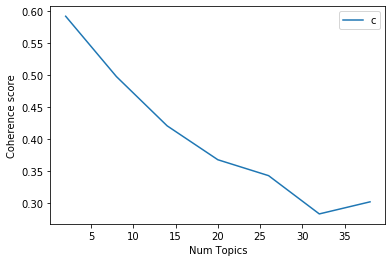

In [0]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5914
Num Topics = 8  has Coherence Value of 0.4975
Num Topics = 14  has Coherence Value of 0.4208
Num Topics = 20  has Coherence Value of 0.368
Num Topics = 26  has Coherence Value of 0.3433
Num Topics = 32  has Coherence Value of 0.2837
Num Topics = 38  has Coherence Value of 0.3025


In [0]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.025*"modi" + 0.015*"india" + 0.010*"..." + 0.010*"shah" + 0.010*"student" '
  '+ 0.010*"regime" + 0.010*"please" + 0.010*"shekhargupta" + 0.005*"amit" + '
  '0.005*"yes"'),
 (1,
  '0.029*"modi" + 0.017*"india" + 0.012*"muslim" + 0.008*"hate" + 0.008*"ha" + '
  '0.008*"free" + 0.008*"terrorist" + 0.008*"finance" + 0.008*"minister" + '
  '0.008*"present"'),
 (2,
  '0.047*"modi" + 0.021*"jhooth" + 0.017*"people" + 0.012*"like" + '
  '0.012*"notmypm" + 0.010*"phto" + 0.010*"played" + 0.010*"voted" + '
  '0.010*"trending" + 0.010*"narendra"'),
 (3,
  '0.024*"modi" + 0.023*"india" + 0.012*"amp" + 0.007*"bjp" + 0.006*"yes" + '
  '0.006*"mirchisayema" + 0.006*"take" + 0.006*"caa" + 0.006*"n\'t" + '
  '0.006*"govt"'),
 (4,
  '0.026*"modi" + 0.019*"national" + 0.019*"anti" + 0.015*"people" + '
  '0.012*"like" + 0.010*"caa" + 0.009*"npr" + 0.007*"govt" + 0.007*"..." + '
  '0.007*"shah"'),
 (5,
  '0.067*"modi" + 0.019*"..." + 0.010*"n\'t" + 0.010*"know" + 0.010*"ha" + '
  '0.007*"india" 

In [0]:
def format_topics_sentences(ldamodel=lda_model, corpus=mycorpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=mycorpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9204,"modi, india, muslim, hate, ha, free, terrorist, finance, minister, present","[modi, terrorist, lot, sunni, muslim, terrorist, islam, religion, bombing, ki…]"
1,1,1.0,0.9327,"modi, india, muslim, hate, ha, free, terrorist, finance, minister, present","[soyoumean, development, blind, believer, modi, india, full, poverty, free, famers, debt, free]"
2,2,7.0,0.8906,"modi, hai, pending, india, year, musalman, ..., country, government, shah","[sushantsin, praising, past, government, find, economical, condit…]"
3,3,5.0,0.8906,"modi, ..., n't, know, ha, india, amp, national, one, reason","[mintpressnews, alanrmacleod, tulsi, gabbard, support, modi, sayin]"
4,4,1.0,0.9205,"modi, india, muslim, hate, ha, free, terrorist, finance, minister, present","[finance, minister, nirmala, sitharaman, present, union, budget, february, full-year, bu…]"
5,5,1.0,0.9416,"modi, india, muslim, hate, ha, free, terrorist, finance, minister, present","[shekhargupta, yehi, saara, kucch, apney, aap, sey, pehley, kar, letey, toh, ..., think, convic…]"
6,6,1.0,0.9205,"modi, india, muslim, hate, ha, free, terrorist, finance, minister, present","[dirty, design, open, present, incident, proved, beyond, doubt, working, na…]"
7,7,2.0,0.7083,"modi, jhooth, people, like, notmypm, phto, played, voted, trending, narendra","[sanjay_jeee, great__modi]"
8,8,4.0,0.9375,"modi, national, anti, people, like, caa, npr, govt, ..., shah","[apart, financial, recklessness, modi-shah-rss, govt, ..., npr, nrc, caa, destroys, ppl, already, bare…]"
9,9,1.0,0.9326,"modi, india, muslim, hate, ha, free, terrorist, finance, minister, present","[push, pamphlet, make, educational, video, blame, modi, directly, instead, let, people, blam…]"


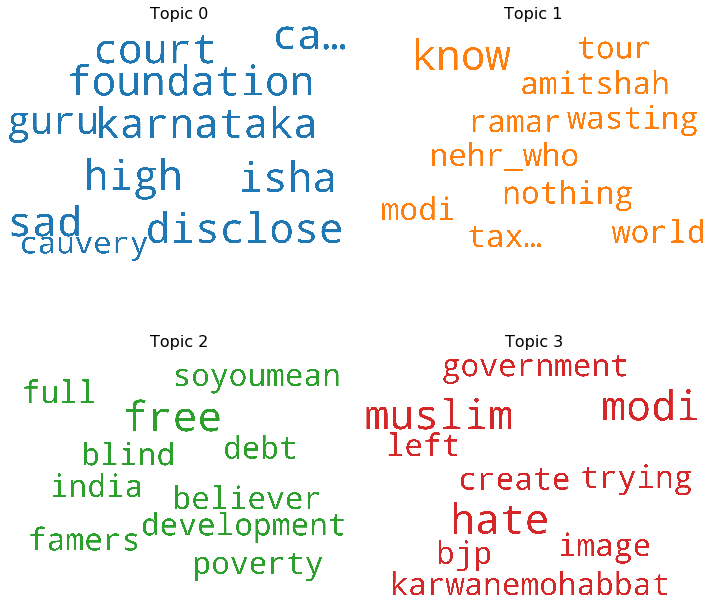

In [0]:

!pip install wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
# from collections import Counter
# topics = lda_model.show_topics(formatted=False)
# data_flat = [w for w_list in text for w in w_list]
# counter = Counter(data_flat)

# out = []
# for i, topic in topics:
#     for word, weight in topic:
#         out.append([word, i , weight, counter[word]])

# df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# # Plot Word Count and Weights of Topic Keywords
# fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
# for i, ax in enumerate(axes.flatten()):
#     ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
#     ax_twin = ax.twinx()
#     ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
#     ax.set_ylabel('Word Count', color=cols[i])
#     ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
#     ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
#     ax.tick_params(axis='y', left=False)
#     ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
#     ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

# fig.tight_layout(w_pad=2)    
# fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
# plt.show()

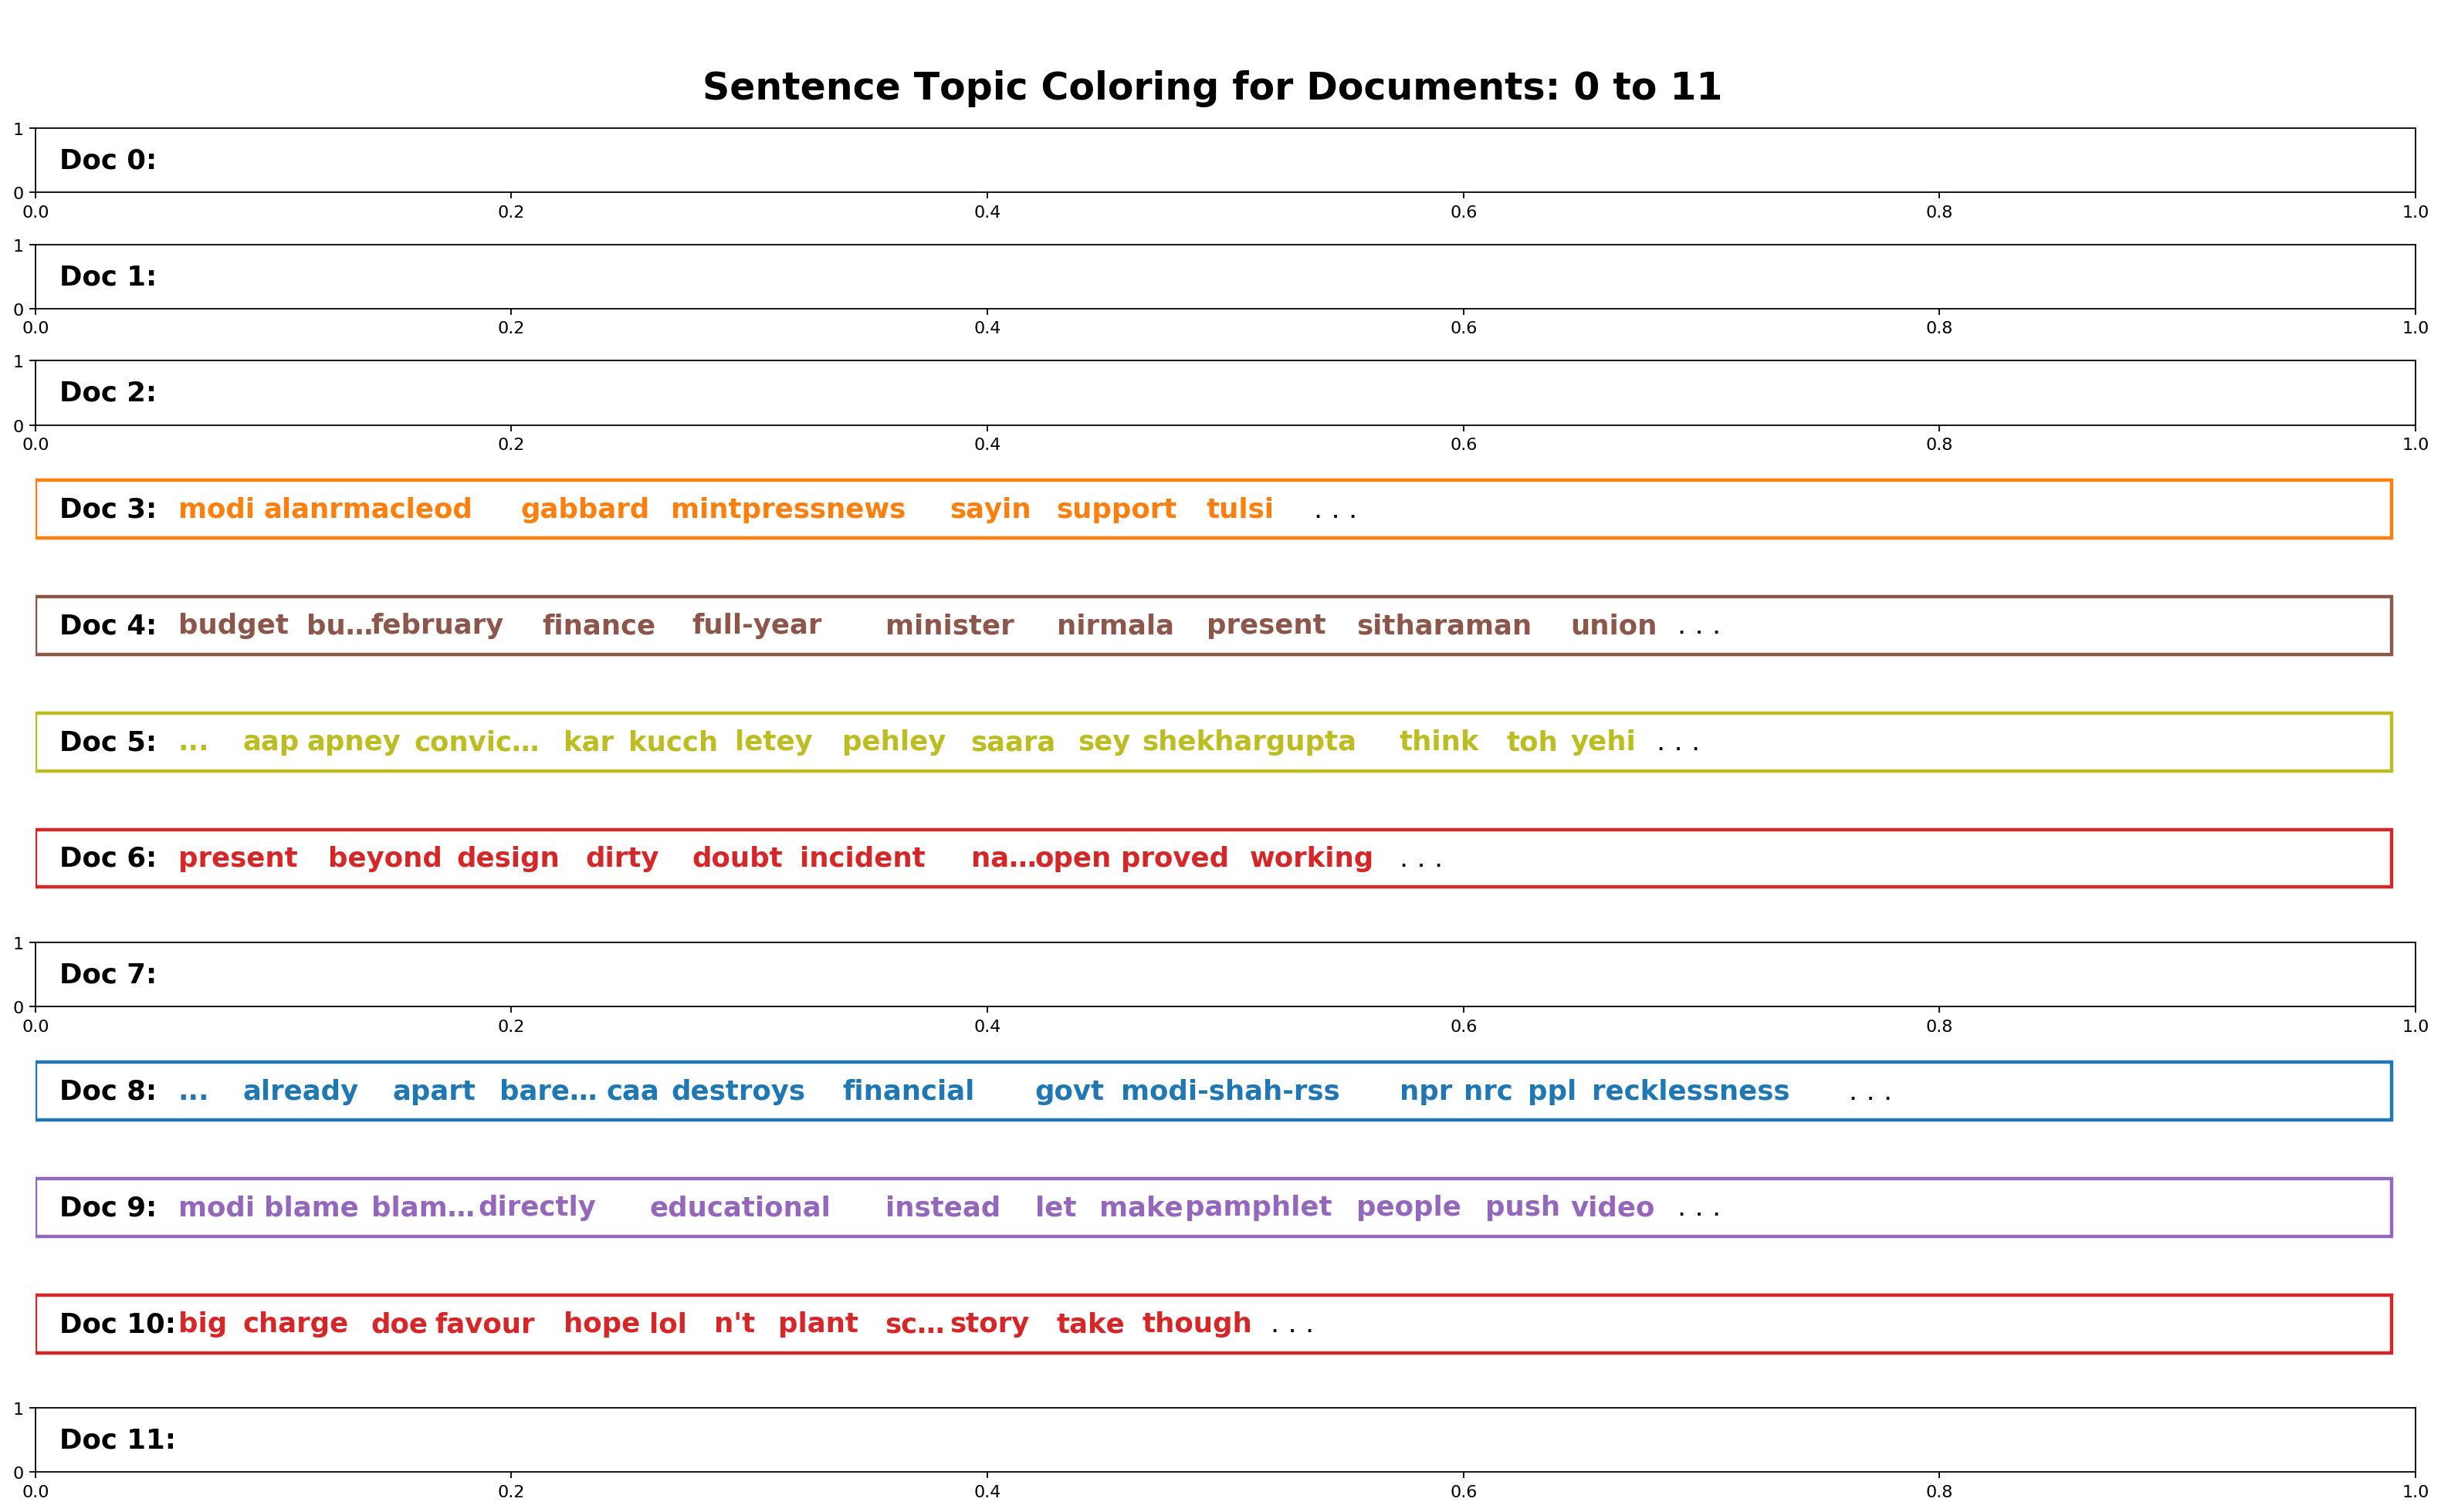

In [0]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=mycorpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            try:
                corp_cur = corp[i-1] 
                topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
                word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
                ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                        fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

                # Draw Rectange
                topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
                ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                       color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

                word_pos = 0.06
                for j, (word, topics) in enumerate(word_dominanttopic):
                    if j < 14:
                        ax.text(word_pos, 0.5, word,
                                horizontalalignment='left',
                                verticalalignment='center',
                                fontsize=16, color=mycolors[topics],
                                transform=ax.transAxes, fontweight=700)
                        word_pos += .009 * len(word)  # to move the word for the next iter
                        ax.axis('off')
                ax.text(word_pos, 0.5, '. . .',
                        horizontalalignment='left',
                        verticalalignment='center',
                        fontsize=16, color='black',
                        transform=ax.transAxes)       
            except:pass
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [0]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[mycorpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.004282
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.348160
[t-SNE] KL divergence after 900 iterations: 0.018946


IndexError: ignored

In [0]:
X

NMF

In [0]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=20, solver="mu")
 
W = nmf.fit_transform(X)
 
H = nmf.components_
 

In [0]:
def get_nmf_topics(nmf, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(4):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = nmf.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [0]:
get_nmf_topics(nmf,4)